In [1]:
import openpathsampling as paths
from openpathsampling.visualize import PathTreeBuilder
from IPython.display import SVG

In [2]:
st = paths.storage.Storage('toy_retis.nc', mode='r')

In [3]:
retis = st.transitions[0]

In [4]:
tree = PathTreeBuilder(st)
tree.rejected = True
tree.states = [ ('blue', retis.stateA) ]

for no, interface in enumerate(retis.interfaces[0:]):
    tree.states.append(('rgb(' + str(no*30) + ',0,0)', interface))

tree.op = lambda snap : 'B' if snap.reversed else 'F'
tree.op = lambda snap : snap.configuration.idx[st]
heritage = tree.construct_heritage(st.samples[100])
tree.from_samples(heritage)

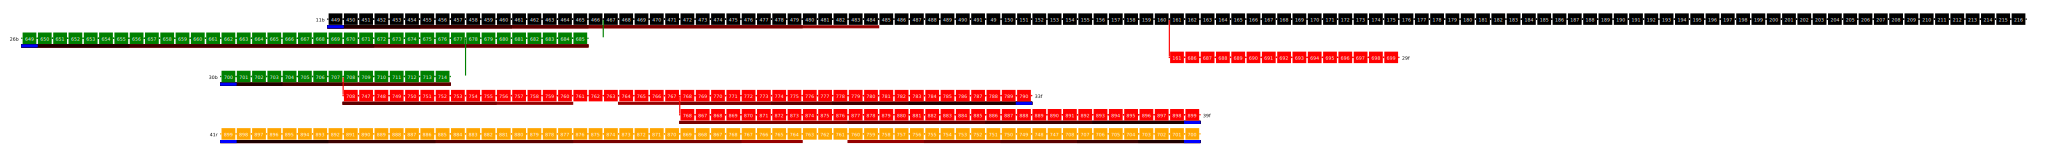

In [5]:
view = tree.renderer
view.zoom = 1.1
view.scale_y = 20
view.scale_x = 16
view.font_size = 0.24
SVG(view.to_svg())

In [6]:
move = paths.visualize.MoveTreeBuilder(st)

In [7]:
move.full(retis.ensembles)

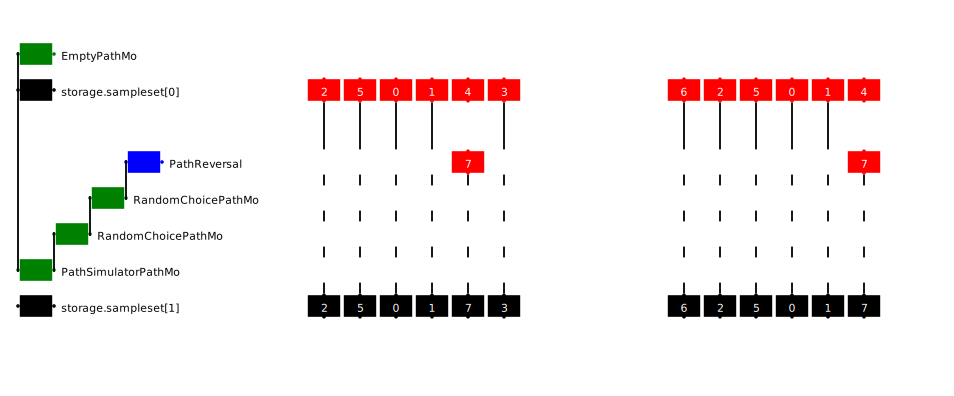

In [10]:
view = move.renderer
view.zoom = 1.5
SVG(view.to_svg())

In [1]:
import openpathsampling as paths
from openpathsampling.visualize import PathTreeBuilder
from IPython.display import SVG
st = paths.storage.Storage('toy_retis.nc', mode='r')
retis = st.transitions[0]
move = paths.visualize.MoveTreeBuilder(st)

In [2]:
mm = retis.default_movers(st.engines[0])

None
None
None
None
None
None
None
None
None
None
None
None
[[<openpathsampling.ensemble.TISEnsemble object at 0x10f58ec90>, <openpathsampling.ensemble.TISEnsemble object at 0x10f5bc450>]]
[[<openpathsampling.ensemble.TISEnsemble object at 0x10f58ec90>, <openpathsampling.ensemble.TISEnsemble object at 0x10f5bc450>]]
[[<openpathsampling.ensemble.TISEnsemble object at 0x10f58ec90>, <openpathsampling.ensemble.TISEnsemble object at 0x10f5bc450>]]
[[<openpathsampling.ensemble.TISEnsemble object at 0x10f58ec90>, <openpathsampling.ensemble.TISEnsemble object at 0x10f5bc450>]]
[[<openpathsampling.ensemble.TISEnsemble object at 0x10f58ec90>, <openpathsampling.ensemble.TISEnsemble object at 0x10f5bc450>]]
[[<openpathsampling.ensemble.TISEnsemble object at 0x10f58ec90>, <openpathsampling.ensemble.TISEnsemble object at 0x10f5bc450>]]
[[<openpathsampling.ensemble.TISEnsemble object at 0x10f5bc450>, <openpathsampling.ensemble.TISEnsemble object at 0x10f5b3ad0>]]
[[<openpathsampling.ensemble.TISEnsem

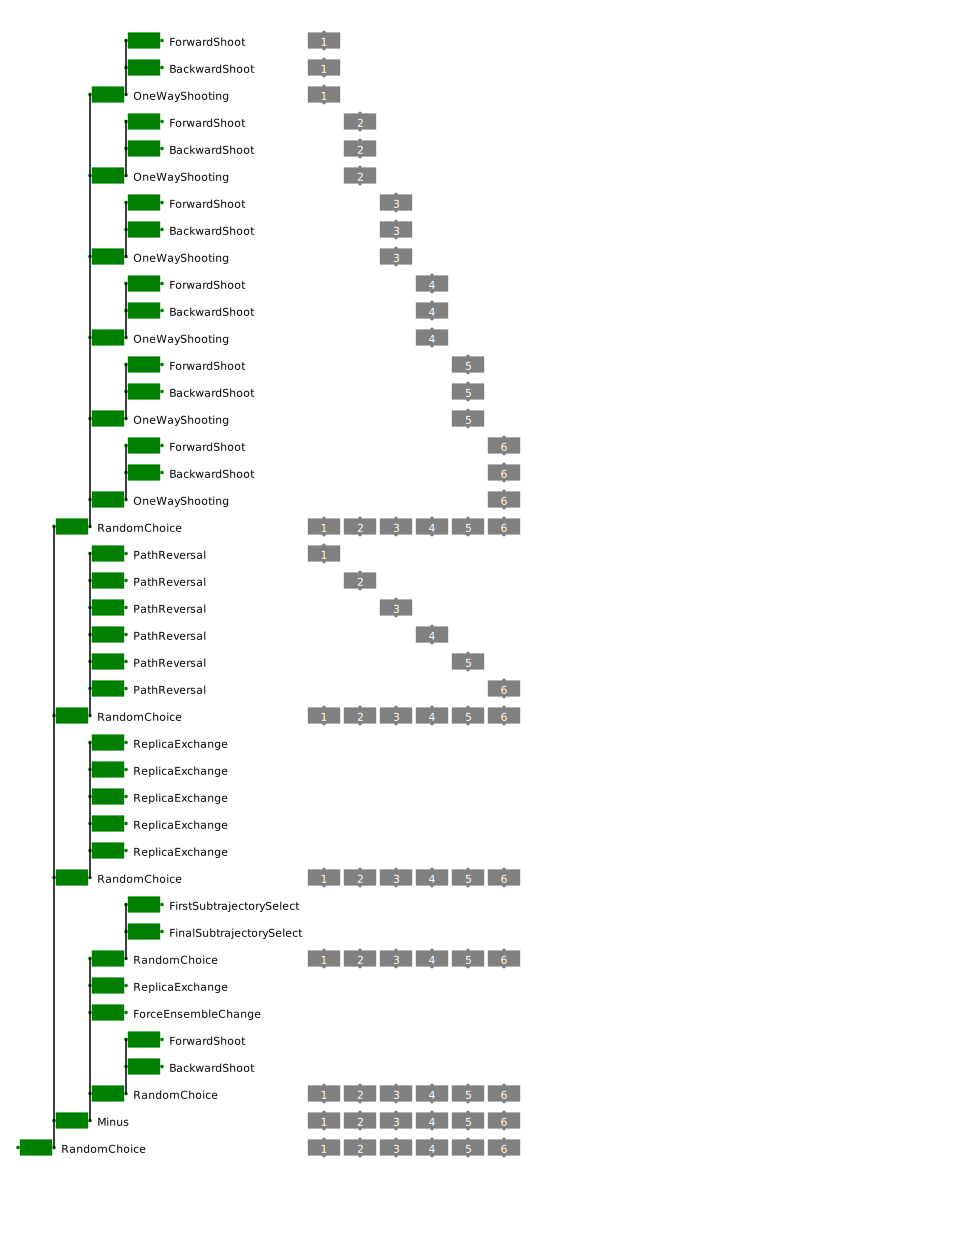

In [3]:
move.mover(mm, retis.ensembles)
view = move.renderer
view.zoom = 1.5
view.scale_y = 18
view.scale_th = 20
view.font_size = 0.4
SVG(view.to_svg())

In [12]:
%matplotlib inline
import json
import numpy as np
import openpathsampling as paths
from openpathsampling.visualize import PathTreeBuilder
from IPython.display import SVG, HTML, Javascript
import networkx as nx
import matplotlib.pyplot as plt
st = paths.storage.Storage('toy_retis.nc', mode='r')
retis = st.transitions[0]
vis = paths.visualize.MoverTreeX()
mm = retis.default_movers(st.engines[0])

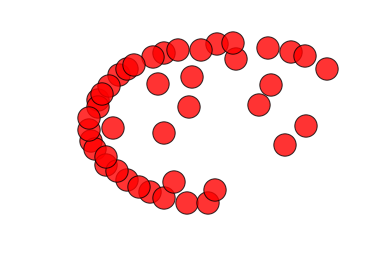

In [3]:
G = vis.mover(mm)

In [38]:
from networkx.readwrite import json_graph
data = json_graph.node_link_data(G)
with open('graph.json', 'w') as f:
    json.dump(data, f, indent=4)

{'id': 40, 'children': [{'id': 34, 'children': [{'id': 32}, {'id': 33}]}, {'id': 35}, {'id': 36}, {'id': 39, 'children': [{'id': 37}, {'id': 38}]}]}


In [33]:
HTML('''
<div id="d3-example"></div>
<style>
.node {stroke: #fff; stroke-width: 2.5px;}
.link {stroke: #999; stroke-opacity: .6;}
</style>
''')

In [34]:
Javascript('''
// We load the d3.js library from the Web.
require.config({paths: {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
    // The code in this block is executed when the 
    // d3.js library has been loaded.
    
    // First, we specify the size of the canvas containing
    // the visualization (size of the <div> element).
    var width = 600,
        height = 600;

    // We create a color scale.
    var color = d3.scale.category10();

    // We create a force-directed dynamic graph layout.
    var force = d3.layout.force()
        .charge(-120)
        .linkDistance(30)
        .size([width, height]);

    // In the <div> element, we create a <svg> graphic
    // that will contain our interactive visualization.
    var svg = d3.select("#d3-example").select("svg")
    if (svg.empty()) {
        svg = d3.select("#d3-example").append("svg")
                    .attr("width", width)
                    .attr("height", height);
    }
        
    // We load the JSON file.
    d3.json("graph.json", function(error, graph) {
        // In this block, the file has been loaded
        // and the 'graph' object contains our graph.
        
        // We load the nodes and links in the force-directed
        // graph.
        force.nodes(graph.nodes)
            .links(graph.links)
            .start();

        // We create a <line> SVG element for each link
        // in the graph.
        var link = svg.selectAll(".link")
            .data(graph.links)
            .enter().append("line")
            .attr("class", "link");

        // We create a <circle> SVG element for each node
        // in the graph, and we specify a few attributes.
        var node = svg.selectAll(".node")
            .data(graph.nodes)
            .enter().append("circle")
            .attr("class", "node")
            .attr("r", 5)  // radius
            .style("fill", function(d) {
                // The node color depends on the club.
                return color(d.club); 
            })
            .call(force.drag);

        // The name of each node is the node number.
        node.append("title")
            .text(function(d) { return d.id; });

        // We bind the positions of the SVG elements
        // to the positions of the dynamic force-directed graph,
        // at each time step.
        force.on("tick", function() {
            link.attr("x1", function(d) { return d.source.x; })
                .attr("y1", function(d) { return d.source.y; })
                .attr("x2", function(d) { return d.target.x; })
                .attr("y2", function(d) { return d.target.y; });

            node.attr("cx", function(d) { return d.x; })
                .attr("cy", function(d) { return d.y; });
        });
    });
});
''')

<IPython.core.display.Javascript object>

In [1]:
%matplotlib inline
import json
import openpathsampling as paths
import openpathsampling.visualize
from IPython.display import SVG, HTML, Javascript
import networkx as nx
from networkx.readwrite import json_graph
st = paths.storage.Storage('toy_retis.nc', mode='r')
retis = st.transitions[0]
vis = paths.visualize.MoverTreeX()
mm = retis.default_movers(st.engines[0])

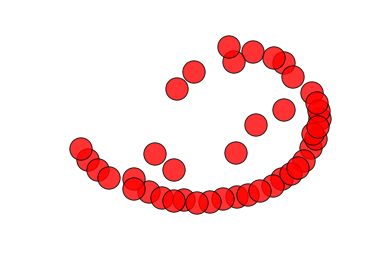

In [76]:
G = vis.mover(mm)
data = json_graph.tree_data(G,len(G)-1)
with open('graph2.json', 'w') as f:
    json.dump(data, f, indent=4)
        
HTML('<script>var graph = ' + json.dumps(data, indent=4) + '; \nconsole.log(graph);</script>');

In [91]:
json.dumps(data, indent=0).replace('\n', ' ')

'{ "children": [ { "children": [ { "children": [ { "name": "FirstSubtrajectorySelectMover",  "id": 32 },  { "name": "FinalSubtrajectorySelectMover",  "id": 33 } ],  "name": "MinusSubtrajectoryChooser",  "id": 34 },  { "name": "ReplicaExchangeMover",  "id": 35 },  { "name": "ForceEnsembleChangeMover",  "id": 36 },  { "children": [ { "name": "ForwardShootMover",  "id": 37 },  { "name": "BackwardShootMover",  "id": 38 } ],  "name": "MinusExtensionDirectionChooser",  "id": 39 } ],  "name": "MinusMover",  "id": 40 },  { "children": [ { "name": "PathReversalMover",  "id": 19 },  { "name": "PathReversalMover",  "id": 20 },  { "name": "PathReversalMover",  "id": 21 },  { "name": "PathReversalMover",  "id": 22 },  { "name": "PathReversalMover",  "id": 23 },  { "name": "PathReversalMover",  "id": 24 } ],  "name": "ReversalChooser",  "id": 25 },  { "children": [ { "children": [ { "name": "ForwardShootMover",  "id": 0 },  { "name": "BackwardShootMover",  "id": 1 } ],  "name": "OneWayShootingMover 

In [88]:
HTML('''
<style>

.node circle {
  fill: #fff;
  stroke: steelblue;
  stroke-width: 1.5px;
}

.node {
  font: 10px sans-serif;
  stroke: black;
  stroke-width:0.35px;
}

.link {
  fill: none;
  stroke: #ccc;
  stroke-width: 1.5px;
}

</style>
<div><svg id="d3-circ-tree-svg-2"></svg></div>
''' + '<script>var graph = ' + json.dumps(data, indent=4) + '; \nconsole.log(graph);</script>' +
'''
<script src="http://d3js.org/d3.v3.min.js"></script>
<script>

var diameter = 800;
var padding = 100;

var tree = d3.layout.tree()
    .size([360, diameter / 2 - 120])
    .separation(function(a, b) { return (a.parent == b.parent ? 1 : 2) / a.depth; });

var diagonal = d3.svg.diagonal.radial()
    .projection(function(d) { return [d.y, d.x / 360 * Math.PI]; });

var vertical = d3.svg.diagonal.radial()
    .projection(function(d) { return [-d.x, -d.y / 360 * Math.PI]; });


var svg = d3.select("#d3-circ-tree-svg-2")
    .attr("width", (diameter + padding))
    .attr("height", (diameter + padding) / 2)
  .append("g")
    .attr("transform", "translate(" + (diameter + padding) / 2 + "," + (0*(diameter + padding) / 2 + 50) + ")rotate(90)");

var treeroot = null;

//d3.json("graph2.json", function(error, root) {
  root = graph
  var nodes = tree.nodes(root),
      links = tree.links(nodes);
    
//    console.log(nodes, tree);

/*  var link = svg.selectAll(".link")
      .data(links)
      .enter().append("path")
      .attr("class", "link")
      .attr("d", diagonal)
*/

  var link2 = svg.selectAll(".link")
      .data(links)
      .enter().append("path")
      .attr("class", "link")
      .attr("d", vertical)

  var node = svg.selectAll(".node")
      .data(nodes)
    .enter().append("g")
      .attr("class", "node")
      .attr("transform", function(d) { return "rotate(" + (d.x / 2 - 90) + ")translate(" + d.y + ")"; })

  node.append("circle")
      .attr("r", 4.5);

  node.append("text")
      .attr("dy", ".31em")
      .attr("text-anchor", function(d) { return d.x < 180 ? "start" : "end"; })
      .attr("transform", function(d) { return d.x < 180 ? "translate(8)" : "rotate(180)translate(-8)"; })
      .text(function(d) { return d.name; });
// });

d3.select(self.frameElement).style("height", diameter + 50 + "px");

</script>
''')

In [81]:
%%javascript


require.config({paths: {d3: "http://d3js.org/d3.v3.min"}});

var tree = null;

require(["d3"], function(d3) {



var diameter = 800;
var padding = 100;

tree = d3.layout.tree()
    .size([360, diameter / 2 - 120])
    .separation(function(a, b) { return (a.parent == b.parent ? 1 : 2) / a.depth; });

var diagonal = d3.svg.diagonal.radial()
    .projection(function(d) { return [d.y, d.x / 360 * Math.PI]; });

var svg = d3.select("#d3-circ-tree-svg")
    .attr("width", (diameter + padding))
    .attr("height", (diameter + padding) / 2)
  .append("g")
    .attr("transform", "translate(" + (diameter + padding) / 2 + "," + (0*(diameter + padding) / 2 + 50) + ")rotate(90)");

d3.json("graph2.json", function(error, root) {
  var nodes = tree.nodes(root),
      links = tree.links(nodes);
    
//    console.log(nodes, tree);

  var link = svg.selectAll(".link")
      .data(links)
    .enter().append("path")
      .attr("class", "link")
      .attr("d", diagonal);

  var node = svg.selectAll(".node")
      .data(nodes)
    .enter().append("g")
      .attr("class", "node")
      .attr("transform", function(d) { return "rotate(" + (d.x / 2 - 90) + ")translate(" + d.y + ")"; })

  node.append("circle")
      .attr("r", 4.5);

  node.append("text")
      .attr("dy", ".31em")
      .attr("text-anchor", function(d) { return d.x < 180 ? "start" : "end"; })
      .attr("transform", function(d) { return d.x < 180 ? "translate(8)" : "rotate(180)translate(-8)"; })
      .text(function(d) { return d.name; });
});

d3.select(self.frameElement).style("height", diameter + 50 + "px");

});

<IPython.core.display.Javascript object>